In [1]:
import houghBoxRotate
import kmeans
import matplotlib.pyplot as plt
import cv2 
import os
import numpy as np
from PIL import Image
import kmeans
import warnings
warnings.filterwarnings("ignore")

## Inverting

In [2]:
# change file names in finalized_dataset
#remove double .png

folder_path = "/home/clr/Thesis/HoughTransform_xray/finalized_dataset/"
image_files = os.listdir(folder_path)

for filename in image_files:
    if filename.endswith(".png.png"):
        new_filename = filename.replace(".png.png", ".png")
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(folder_path, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)

In [3]:
#invert some images. run once

folder_path = "/home/clr/Thesis/HoughTransform_xray/finalized_dataset/"
txt_path = "/home/clr/Thesis/HoughTransform_xray/to_invert.txt"

to_invert = []

with open(txt_path) as my_file:
    to_invert = my_file.read().splitlines() 


for image_path in to_invert:
    image = np.array(Image.open(folder_path+image_path).convert('L'))
    inverted_image = cv2.bitwise_not(image)
    cv2.imwrite(folder_path+image_path, inverted_image)


## Rotation

In [5]:
folder_path = "/home/clr/Thesis/HoughTransform_xray/finalized_dataset/"
output_paths = [
    "/home/clr/Thesis/HoughTransform_xray/outputs/output_0/",
    "/home/clr/Thesis/HoughTransform_xray/outputs/output_1/",
    "/home/clr/Thesis/HoughTransform_xray/outputs/output_2/"
    ]
outliers_path = "/home/clr/Thesis/HoughTransform_xray/anomalies/"
# skipped_images = "/home/clr/Thesis/HoughTransform_xray/outputs/skipped_images/"

th_less = [0.2, 0.5, 0.7 ] #percentage to lessen threshold
txt_path = "/home/clr/Thesis/HoughTransform_xray/to_invert.txt"

#run the process. will run 3 times each having a lesser segmentation threshold
def run_hough(image_input, image_output, th):
    print("Processing:", image_input)
    image_output, non_centered = houghBoxRotate.houghT_rotate(image_input, image_output, outliers_path ,  th)
    return image_output, non_centered

for i, th in enumerate(th_less):
    if i == 0:
        #will brighten image on first run only
        image_output, non_centered = run_hough(folder_path, output_paths[i], th)
    else:
        image_output, non_centered = run_hough(output_paths[i-1], output_paths[i], th)

Processing: /home/clr/Thesis/HoughTransform_xray/finalized_dataset/


Processing images: 100%|██████████| 1454/1454 [01:53<00:00, 12.80image/s]


Processing: /home/clr/Thesis/HoughTransform_xray/outputs/output_0/


Processing images: 100%|██████████| 1454/1454 [01:42<00:00, 14.15image/s]


Processing: /home/clr/Thesis/HoughTransform_xray/outputs/output_1/


Processing images: 100%|██████████| 1454/1454 [01:44<00:00, 13.95image/s]


## k-means Segmentation

In [3]:
# folder_path = "/home/clr/Thesis/HoughTransform_xray/finalized_dataset/"
segmented_output = "/home/clr/Thesis/HoughTransform_xray/kmeans_segmented/"
image_masked = kmeans.kmeans_segment(output_paths[2], segmented_output)

Segmenting images: 100%|██████████| 1454/1454 [01:36<00:00, 15.05img/s]


### Checking output

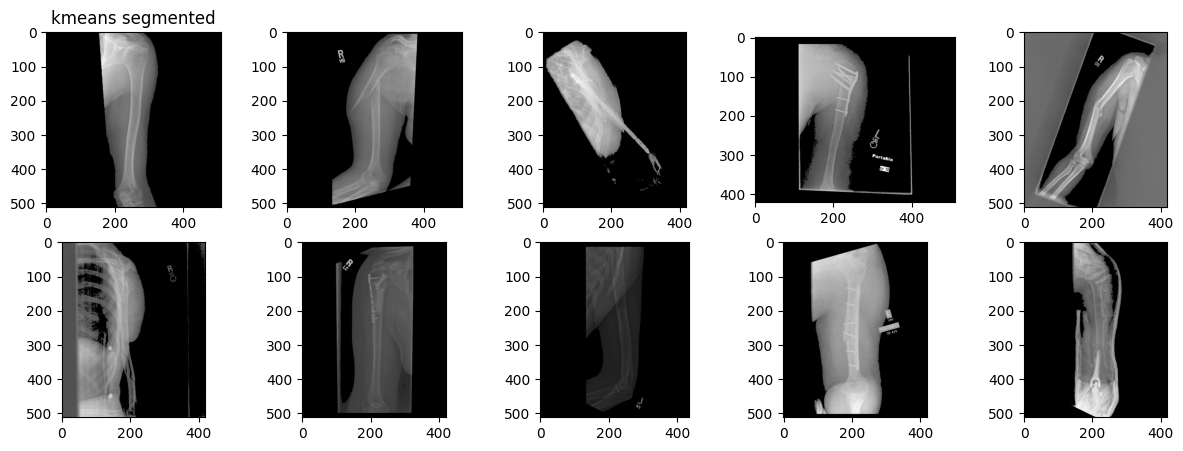

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
ax[0][0].imshow(image_masked[0], cmap='gray')
ax[0][0].set_title("kmeans segmented")
ax[0][1].imshow(image_masked[10], cmap='gray')
ax[0][2].imshow(image_masked[40], cmap='gray')
ax[0][3].imshow(image_masked[50], cmap='gray')
ax[0][4].imshow(image_masked[60], cmap='gray')
ax[1][0].imshow(image_masked[70], cmap='gray')
ax[1][1].imshow(image_masked[80], cmap='gray')
ax[1][2].imshow(image_masked[90], cmap='gray')
ax[1][3].imshow(image_masked[100], cmap='gray')
ax[1][4].imshow(image_masked[110], cmap='gray')